In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
plt.style.use("https://github.com/mlefkir/beauxgraphs/raw/main/beautifulgraphs_colblind.mplstyle")

# Modelling with an autocovariance function


The autocovariance function of the time series is represented by the object {class}`~pioran.acvf_base.CovarianceFunction`. More details about this class and the implemented models can be found [here](../apidoc/ACVF). We will describe how to use, combine and create models for the autocovariance function in the following sections.

## A first model

We show how to use the models implemented in `apidoc/` to compute the autocovariance at given time lags. We first define an instance of the chosen class. In this example, we create instances of the classes {class}`~pioran.acvf.Exponential`and {class}`~pioran.acvf.Matern32`. 

The values of the parameters of the models are given as a list of floats, during instantiation.

In [3]:
from pioran.acvf import Exponential, Matern32

Expo = Exponential([1, 0.5])
Mat32 = Matern32([1.2, 0.5])

A ``CovarianceFunction`` object has a field ``parameters`` which an object of the class {class}`~pioran.parameters.ParametersModel` storing for the parameters of the model. We can inspect the values of the parameters of the model by printing the ``CovarianceFunction`` object. 

In [4]:
print(Mat32)

Covariance function: matern32
Number of parameters: 2
CID  ID   Name            Value          Status    Linked    Type            
1    1    variance        1.2            Free      No        Hyper-parameter 
1    2    length          0.5            Free      No        Hyper-parameter 




If we want to change the values of the parameters of the model, we can use the method ``set_free_values`` on the attribute``CovarianceFunction.parameters``. The method takes as input a list of floats, which are the values of the free parameters of the model. Currently, it is not possible to change the values of the fixed parameters of the model after instantiation. To do so, we need to create a new instance of the model and set the parameters as free or fixed using the keyword argument ``free_parameters``. More details about the class {class}`~pioran.parameters.ParametersModel` can be found [here](../apidoc/Parameters).

In [5]:
Mat32.parameters.set_free_values([2.2, 1.5])
print(Mat32)

Covariance function: matern32
Number of parameters: 2
CID  ID   Name            Value          Status    Linked    Type            
1    1    variance        2.2            Free      No        Hyper-parameter 
1    2    length          1.5            Free      No        Hyper-parameter 




We can evaluate the autocovariance function at given time lags by calling the method ``calculate`` of the ``CovarianceFunction`` object. The method ``calculate`` takes as input a list of floats representing the time lags at which the autocovariance function is evaluated. The method returns a list of floats representing the values of the autocovariance function at the given time lags.

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


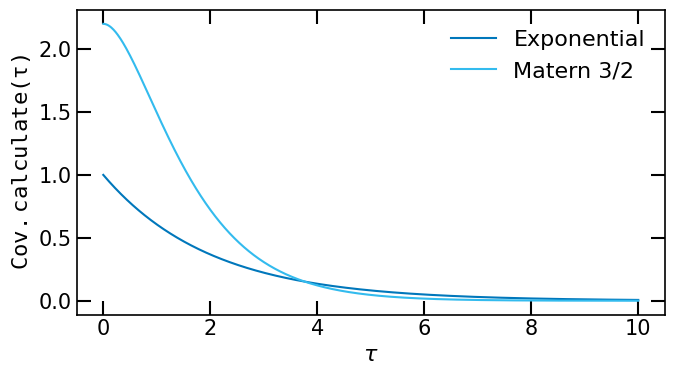

In [6]:
t = jnp.linspace(0, 10, 1000)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(t, Expo.calculate(t), label="Exponential")
ax.plot(t, Mat32.calculate(t), label="Matern 3/2")
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\tt{Cov.calculate}(\tau)$')
ax.legend()
fig.tight_layout()

The covariance matrix can be obtained by calling the method {meth}```~pioran.acvf_base.CovarianceFunction.get_cov_matrix```. This method takes in input two arrays of shape $(N,1)$ and $(M,1)$ representing the time lags at which the covariance matrix is evaluated. The method returns a matrix of shape $(N,M)$ representing the covariance matrix at the given time lags.

In [7]:
K_Mat32 = Mat32.get_cov_matrix(t.reshape(-1, 1), t.reshape(-1, 1))
K_expo = Expo.get_cov_matrix(t.reshape(-1, 1), t.reshape(-1, 1))

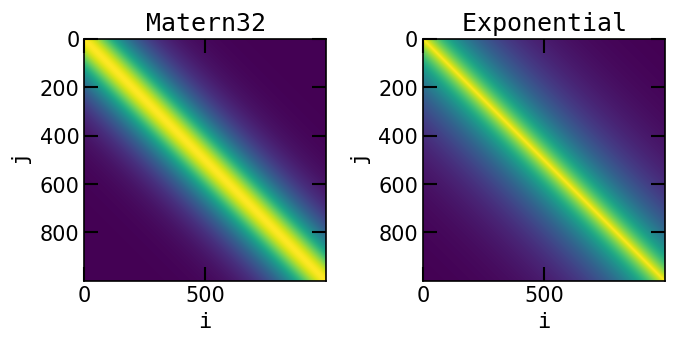

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(7, 4))

ax[0].imshow(K_Mat32)
ax[0].set_xlabel(r'$\tt{i}$')
ax[0].set_ylabel(r'$\tt{j}$')
ax[0].set_title(r'$\tt{Matern32}$')

ax[1].imshow(K_expo)
ax[1].set_xlabel(r'$\tt{i}$')
ax[1].set_ylabel(r'$\tt{j}$')
ax[1].set_title(r'$\tt{Exponential}$')
fig.tight_layout()

## Combining autocovariance functions

In this section, we show how to combine autocovariance functions via arithmetic operations.

In this example we create instances of the classes {class}`~pioran.acvf.Exponential`, {class}`~pioran.acvf.SquaredExponential` and {class}`~pioran.acvf.Matern32`. 

In [9]:
from pioran.acvf import Exponential, Matern32, SquaredExponential

Expo = Exponential([1.68, 0.75])
Mat32 = Matern32([.33, 1.5])
SqExpo = SquaredExponential([1.45, 0.5])

### Sum of autocovariance functions

We can create a model which is the sum of the three components by using the ``+`` operator. The result is a new instance of the class {class}`~pioran.acvf_base.CovarianceFunction`. We can inspect the parameters of the model by printing the object.

In [10]:
Model = Expo + Mat32 + SqExpo
print(Model)

Covariance function: exponential + matern32 + squared_exponential
Number of parameters: 6
CID  ID   Name            Value          Status    Linked    Type            
1    1    variance        1.68           Free      No        Hyper-parameter 
1    2    length          0.75           Free      No        Hyper-parameter 
2    3    variance        0.33           Free      No        Hyper-parameter 
2    4    length          1.5            Free      No        Hyper-parameter 
3    5    variance        1.45           Free      No        Hyper-parameter 
3    6    length          0.5            Free      No        Hyper-parameter 




Because several parameters have identical names it is necessary to use the indices of the parameters to access them. ``CID`` gives the component index and ``ID`` gives the parameter index in the whole model.

In [11]:
print(Model.parameters[5])

3    5    variance        1.45           Free      No        Hyper-parameter 


As previously, we can change the values of the free parameters:

In [12]:
Model.parameters.set_free_values([13.68, 0.975, 0.339, 1.95, 1.345, 3.5])
print(Model)

Covariance function: exponential + matern32 + squared_exponential
Number of parameters: 6
CID  ID   Name            Value          Status    Linked    Type            
1    1    variance        13.68          Free      No        Hyper-parameter 
1    2    length          0.975          Free      No        Hyper-parameter 
2    3    variance        0.339          Free      No        Hyper-parameter 
2    4    length          1.95           Free      No        Hyper-parameter 
3    5    variance        1.345          Free      No        Hyper-parameter 
3    6    length          3.5            Free      No        Hyper-parameter 




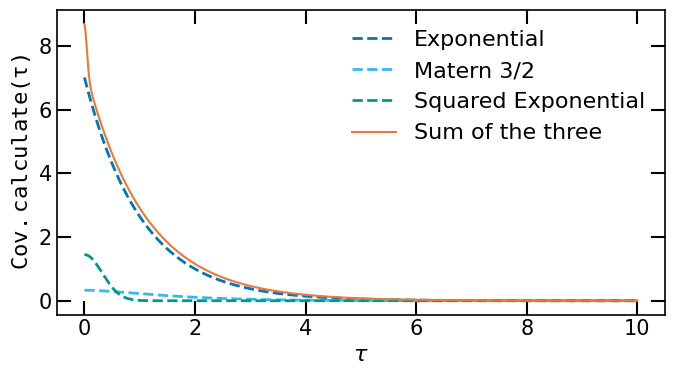

In [13]:
t = jnp.linspace(0, 10, 1000)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))

ax.plot(t, Expo.calculate(t), label="Exponential", lw=2,ls="--")
ax.plot(t, Mat32.calculate(t), label="Matern 3/2", lw=2,ls="--")
ax.plot(t, SqExpo.calculate(t), label="Squared Exponential", lw=2,ls="--")
ax.plot(t, Model.calculate(t), label="Sum of the three")
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\tt{Cov.calculate}(\tau)$')
ax.legend()
fig.tight_layout()

### Product of autocovariance functions

We can create a model which is a product of covariance functions by using the ``*`` operator. The result is a new instance of the class {class}`~pioran.acvf_base.CovarianceFunction`. We show an example with the product of the two first components plus the third component.

In [14]:
Expo = Exponential([1.68, 0.75])
Mat32 = Matern32([.33, 1.5])
SqExpo = SquaredExponential([.45, 0.5])

Model = Expo * Mat32+ SqExpo
print(Model)

Covariance function: exponential * matern32 + squared_exponential
Number of parameters: 6
CID  ID   Name            Value          Status    Linked    Type            
1    1    variance        1.68           Free      No        Hyper-parameter 
1    2    length          0.75           Free      No        Hyper-parameter 
2    3    variance        0.33           Free      No        Hyper-parameter 
2    4    length          1.5            Free      No        Hyper-parameter 
3    5    variance        0.45           Free      No        Hyper-parameter 
3    6    length          0.5            Free      No        Hyper-parameter 




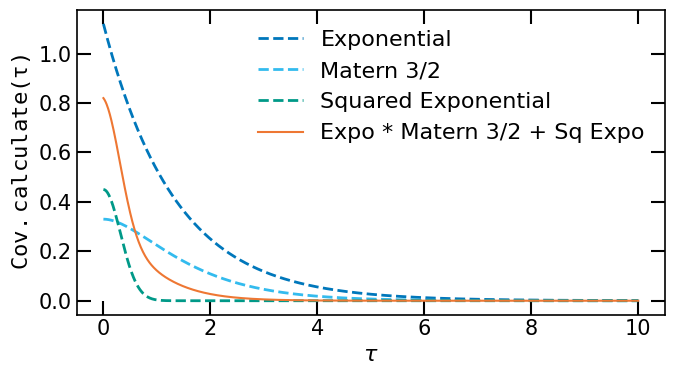

In [15]:
t = jnp.linspace(0, 10, 1000)

fig, ax = plt.subplots(1, 1, figsize=(7, 4))

ax.plot(t, Expo.calculate(t), label="Exponential", lw=2,ls="--")
ax.plot(t, Mat32.calculate(t), label="Matern 3/2", lw=2,ls="--")
ax.plot(t, SqExpo.calculate(t), label="Squared Exponential", lw=2,ls="--")
ax.plot(t, Model.calculate(t), label="Expo * Matern 3/2 + Sq Expo")
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\tt{Cov.calculate}(\tau)$')
ax.legend()
fig.tight_layout()

## Writing a new model

Here we show how to write a new model for the autocovariance function, which can be used like any models we have shown above.

### Creating the class and the constructor
We write a new class ``MyAutocovariance``, which inherits from `CovarianceFunction`. It is important to specify the attributes ``parameters`` and ``expression`` at the class level as `CovarianceFunction` inherits from {class}`~equinox.Module`. ``parameters`` is an object of the class {class}`~pioran.parameters.ParametersModel` which is a container for the parameters of the model. The constructor ``__init__`` must be defined as in the example and the names of the parameters are given in the ``param_names`` list. 



### The ``calculate`` method
The ``calculate`` method must be defined and it must return the autocovariance function evaluated at the time ``t``. When writing the expression of the autocovariance function, the values of parameters of the model can be accessed using the attribute ``self.parameters['name'].value`` where ``name`` is the name of the parameter.

This method is then called by the method {meth}`~pioran.acvf_base.CovarianceFunction.get_cov_matrix` to compute for instance the likelihood or the posterior predictive distribution of a Gaussian process.


In [17]:
import jax.numpy as jnp
from pioran import CovarianceFunction
from pioran.parameters import ParametersModel

class MyAutocovariance(CovarianceFunction):
    parameters: ParametersModel
    expression = 'name of the model'

    def __init__(self, param_values, **kwargs):
        """Constructor of the covariance function inherited 
        from the CovarianceFunction class.
        """
        assert len(param_values) == 3, 'The number of parameters must be 3'
        free_parameters = kwargs.get('free_parameters', [True, True, True])
        CovarianceFunction.__init__(self, param_values=param_values, 
        param_names=['variance', 'length','period'], free_parameters=free_parameters)
    
    def calculate(self,t) -> jnp.array:
        """Returns the autocovariance function evaluated at t.
        """
        return  self.parameters['variance'].value *jnp.exp(- jnp.abs(t) * self.parameters['length'].value)*jnp.cos(2*jnp.pi*t / self.parameters['period'].value)

We can use the newly defined model as any other models we have shown above:

In [18]:
Cov = MyAutocovariance([1., 0.5,.5])
taus = jnp.linspace(0, 10, 1000)
avc = Cov.calculate(taus)

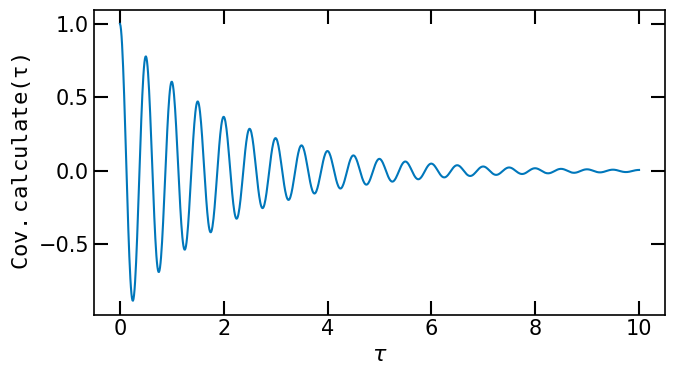

In [19]:
fig, ax = plt.subplots(1,1,figsize=(7,4))
ax.plot(taus, avc)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\tt{Cov.calculate}(\tau)$')
fig.tight_layout()